<a href="https://colab.research.google.com/github/yoonyoung27/prac_class/blob/main/personal_project_M1F4_%EC%A7%80%EC%9C%A4%EC%98%81.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#신용카드 사용자 연체 예측 AI 경진대회

https://www.dacon.io/competitions/official/235713/overview/description/

###✓ Import data

In [80]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import pandas as pd

In [5]:
user_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/train.csv')
user_train.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,NaN,2.0,-6.0,1.0
1,1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0
2,2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,1,0,1,0,Managers,2.0,-22.0,2.0
3,3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,1,0,1,0,Sales staff,2.0,-37.0,0.0
4,4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,-15037,-2105,1,0,0,0,Managers,2.0,-26.0,2.0


In [6]:
user_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/test.csv')
user_test.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month
0,26457,M,Y,N,0,112500.0,Pensioner,Secondary / secondary special,Civil marriage,House / apartment,-21990,365243,1,0,1,0,NaN,2.0,-60.0
1,26458,F,N,Y,0,135000.0,State servant,Higher education,Married,House / apartment,-18964,-8671,1,0,1,0,Core staff,2.0,-36.0
2,26459,F,N,Y,0,69372.0,Working,Secondary / secondary special,Married,House / apartment,-15887,-217,1,1,1,0,Laborers,2.0,-40.0
3,26460,M,Y,N,0,112500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-19270,-2531,1,1,0,0,Drivers,2.0,-41.0
4,26461,F,Y,Y,0,225000.0,State servant,Higher education,Married,House / apartment,-17822,-9385,1,1,0,0,Managers,2.0,-8.0


###✓ Prepare the data

1. user_train의 occyp_type 항목에는 8171개의 결측치가 존재한다  
  -> user_train에서 결측치가 존재하는 occyp_type 항목을 제거한다

In [7]:
user_train.isnull().sum()

index               0
gender              0
car                 0
reality             0
child_num           0
income_total        0
income_type         0
edu_type            0
family_type         0
house_type          0
DAYS_BIRTH          0
DAYS_EMPLOYED       0
FLAG_MOBIL          0
work_phone          0
phone               0
email               0
occyp_type       8171
family_size         0
begin_month         0
credit              0
dtype: int64

In [8]:
user_train = user_train.drop("occyp_type", axis=1)

2. user_train의 각 항목의 값은 다음과 같이 분류되어 있다  
  -> ① 값의 분류가 2개 이하, 2개 초과 10개 이하, 10개 초과인 항목으로 구분한다

In [9]:
unique_len = user_train.apply(lambda x: len(x.unique()))
unique_len

index            26457
gender               2
car                  2
reality              2
child_num            9
income_total       249
income_type          5
edu_type             5
family_type          5
house_type           6
DAYS_BIRTH        6621
DAYS_EMPLOYED     3470
FLAG_MOBIL           1
work_phone           2
phone                2
email                2
family_size         10
begin_month         61
credit               3
dtype: int64

In [10]:
group_1 = unique_len[unique_len <= 2].index
group_1

Index(['gender', 'car', 'reality', 'FLAG_MOBIL', 'work_phone', 'phone',
       'email'],
      dtype='object')

In [11]:
group_2 = unique_len[(unique_len > 2)&(unique_len <= 10)].index
group_2

Index(['child_num', 'income_type', 'edu_type', 'family_type', 'house_type',
       'family_size', 'credit'],
      dtype='object')

In [12]:
group_3 = unique_len[(unique_len > 10)].index
group_3

Index(['index', 'income_total', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'begin_month'], dtype='object')

2. ->② group_1의 항목을 이진변수로 인코딩한다

In [13]:
user_train[group_1]

,gender,car,reality,FLAG_MOBIL,work_phone,phone,email
0,F,N,N,1,0,0,0
1,F,N,Y,1,0,0,1
2,M,Y,Y,1,0,1,0
3,F,N,Y,1,0,1,0
4,F,Y,Y,1,0,0,0
...,...,...,...,...,...,...,...
26452,F,N,N,1,0,0,0
26453,F,N,Y,1,0,0,0
26454,F,Y,N,1,0,0,0
26455,M,N,Y,1,0,0,0


* gender, car, reality 항목을 이진변수로 인코딩한다.

In [14]:
user_train['gender'] = user_train['gender'].replace(['F','M'], [0,  1])
user_train['car'] = user_train['car'].replace(['N', 'Y'], [0, 1])
user_train['reality'] = user_train['reality'].replace(['N', 'Y'], [0, 1])

In [15]:
user_train[group_1]

,gender,car,reality,FLAG_MOBIL,work_phone,phone,email
0,0,0,0,1,0,0,0
1,0,0,1,1,0,0,1
2,1,1,1,1,0,1,0
3,0,0,1,1,0,1,0
4,0,1,1,1,0,0,0
...,...,...,...,...,...,...,...
26452,0,0,0,1,0,0,0
26453,0,0,1,1,0,0,0
26454,0,1,0,1,0,0,0
26455,1,0,1,1,0,0,0


2. ->③ group_2의 항목을 다음과 같이 인코딩한다

In [16]:
user_train[group_2]

,child_num,income_type,edu_type,family_type,house_type,family_size,credit
0,0,Commercial associate,Higher education,Married,Municipal apartment,2.0,1.0
1,1,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,3.0,1.0
2,0,Working,Higher education,Married,House / apartment,2.0,2.0
3,0,Commercial associate,Secondary / secondary special,Married,House / apartment,2.0,0.0
4,0,State servant,Higher education,Married,House / apartment,2.0,2.0
...,...,...,...,...,...,...,...
26452,2,State servant,Secondary / secondary special,Married,House / apartment,4.0,1.0
26453,1,Working,Higher education,Separated,House / apartment,2.0,2.0
26454,0,Working,Secondary / secondary special,Civil marriage,With parents,2.0,2.0
26455,0,Working,Incomplete higher,Single / not married,House / apartment,1.0,2.0


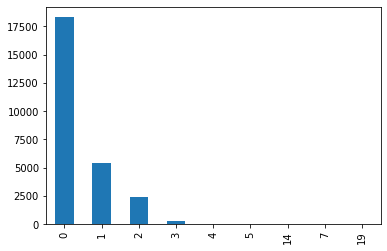

In [17]:
user_train["child_num"].value_counts().plot.bar()

* 연속형 변수를 갖는 child_num 항목에서 3이상의 값은 그 값이 거의 존재하지 않으므로 이상치로 처리로서 2로 바꿔준다

In [18]:
user_train.loc[user_train['child_num'] > 2, 'child_num'] = 2

* categorical 변수를 갖는 income_type, edu_type, family_type, house_type항목을 preprocessing 라이브러리의 LabelEncoder 메서드를 이용하여 연속형 변수로 인코딩한다

In [19]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

In [20]:
user_train['income_type'] = label_encoder.fit_transform(user_train['income_type'])
user_train['edu_type'] = label_encoder.fit_transform(user_train['edu_type'])
user_train['family_type'] = label_encoder.fit_transform(user_train['family_type'])
user_train['house_type'] = label_encoder.fit_transform(user_train['house_type'])

In [21]:
user_train[group_2]

,child_num,income_type,edu_type,family_type,house_type,family_size,credit
0,0,0,1,1,2,2.0,1.0
1,1,0,4,0,1,3.0,1.0
2,0,4,1,1,1,2.0,2.0
3,0,0,4,1,1,2.0,0.0
4,0,2,1,1,1,2.0,2.0
...,...,...,...,...,...,...,...
26452,2,2,4,1,1,4.0,1.0
26453,1,4,1,2,1,2.0,2.0
26454,0,4,4,0,5,2.0,2.0
26455,0,4,2,3,1,1.0,2.0


2. ->④ group_3의 항목을 범주화하여 인코딩한다

In [22]:
user_train[group_3]

,index,income_total,DAYS_BIRTH,DAYS_EMPLOYED,begin_month
0,0,202500.0,-13899,-4709,-6.0
1,1,247500.0,-11380,-1540,-5.0
2,2,450000.0,-19087,-4434,-22.0
3,3,202500.0,-15088,-2092,-37.0
4,4,157500.0,-15037,-2105,-26.0
...,...,...,...,...,...
26452,26452,225000.0,-12079,-1984,-2.0
26453,26453,180000.0,-15291,-2475,-47.0
26454,26454,292500.0,-10082,-2015,-25.0
26455,26455,171000.0,-10145,-107,-59.0


In [23]:
import numpy as np
counts, bin_dividers_1 = np.histogram(user_train['income_total'], bins = 7)
user_train['income_total'] = pd.factorize(pd.cut(user_train['income_total'],          #pd.cut()은 category형을 반환하기 때문에 pd.factorize()를 이용하여 array형으로 변환한다
                                                 bins = bin_dividers_1,                 #각각의 항목이 속하는 구간을 반환한다
                                                 include_lowest=True,                 #구간의 시작점을 구간에 포함한다
                                                 labels = [i for i in range(7)]))[0]  #각각의 구간에 0-6의 label를 부여한다

* numpy 라이브러리의 histogram() 메서드를 이용하여 구간을 나눈다
* histogran() 메서드는 각 구간 요소의 개수와 구간의 분절점을 반환한다

In [24]:
counts, bin_dividers_2 = np.histogram(user_train['DAYS_BIRTH'], bins = 10)
user_train['DAYS_BIRTH'] = pd.factorize(pd.cut(user_train['DAYS_BIRTH'],
                                               bins = bin_dividers_2,
                                               include_lowest=True,
                                               labels = [i for i in range(10)]))[0]

In [25]:
counts, bin_dividers_3 = np.histogram(user_train['DAYS_EMPLOYED'], bins = 6)
user_train['DAYS_EMPLOYED'] = pd.factorize(pd.cut(user_train['DAYS_EMPLOYED'],
                                                  bins = bin_dividers_3,
                                                  include_lowest=True,
                                                  labels = [i for i in range(6)]))[0]

In [26]:
counts, bin_dividers_4 = np.histogram(user_train['begin_month'], bins = 4)
user_train['begin_month'] = pd.factorize(pd.cut(user_train['begin_month'],
                                                bins = bin_dividers_4,
                                                include_lowest=True,
                                                labels = [i for i in range(4)]))[0]

In [27]:
user_train[group_3]

,index,income_total,DAYS_BIRTH,DAYS_EMPLOYED,begin_month
0,0,0,0,0,0
1,1,0,1,0,0
2,2,1,2,0,1
3,3,0,3,0,2
4,4,0,3,0,1
...,...,...,...,...,...
26452,26452,0,1,0,0
26453,26453,0,3,0,3
26454,26454,1,5,0,1
26455,26455,0,5,0,3


3. user_test에 대하여 2와 같은 인코딩을 한다

In [28]:
user_test.isnull().sum()

index               0
gender              0
car                 0
reality             0
child_num           0
income_total        0
income_type         0
edu_type            0
family_type         0
house_type          0
DAYS_BIRTH          0
DAYS_EMPLOYED       0
FLAG_MOBIL          0
work_phone          0
phone               0
email               0
occyp_type       3152
family_size         0
begin_month         0
dtype: int64

In [29]:
user_test = user_test.drop("occyp_type", axis=1)

In [30]:
unique_len = user_test.apply(lambda x: len(x.unique()))
unique_len

index            10000
gender               2
car                  2
reality              2
child_num            6
income_total       208
income_type          5
edu_type             5
family_type          5
house_type           6
DAYS_BIRTH        4675
DAYS_EMPLOYED     2665
FLAG_MOBIL           1
work_phone           2
phone                2
email                2
family_size          7
begin_month         61
dtype: int64

In [31]:
group_1 = unique_len[unique_len <= 2].index
group_2 = unique_len[(unique_len > 2)&(unique_len <= 10)].index
group_3 = unique_len[(unique_len > 10)].index

In [32]:
user_test[group_1]

,gender,car,reality,FLAG_MOBIL,work_phone,phone,email
0,M,Y,N,1,0,1,0
1,F,N,Y,1,0,1,0
2,F,N,Y,1,1,1,0
3,M,Y,N,1,1,0,0
4,F,Y,Y,1,1,0,0
...,...,...,...,...,...,...,...
9995,F,Y,Y,1,1,1,0
9996,M,Y,Y,1,1,0,0
9997,F,N,Y,1,0,0,0
9998,F,Y,N,1,0,1,0


In [33]:
user_test['gender'] = user_test['gender'].replace(['F','M'], [0,  1])
user_test['car'] = user_test['car'].replace(['N', 'Y'], [0, 1])
user_test['reality'] = user_test['reality'].replace(['N', 'Y'], [0, 1])

In [34]:
user_test[group_1]

,gender,car,reality,FLAG_MOBIL,work_phone,phone,email
0,1,1,0,1,0,1,0
1,0,0,1,1,0,1,0
2,0,0,1,1,1,1,0
3,1,1,0,1,1,0,0
4,0,1,1,1,1,0,0
...,...,...,...,...,...,...,...
9995,0,1,1,1,1,1,0
9996,1,1,1,1,1,0,0
9997,0,0,1,1,0,0,0
9998,0,1,0,1,0,1,0


In [35]:
user_test[group_2]

,child_num,income_type,edu_type,family_type,house_type,family_size
0,0,Pensioner,Secondary / secondary special,Civil marriage,House / apartment,2.0
1,0,State servant,Higher education,Married,House / apartment,2.0
2,0,Working,Secondary / secondary special,Married,House / apartment,2.0
3,0,Commercial associate,Secondary / secondary special,Married,House / apartment,2.0
4,0,State servant,Higher education,Married,House / apartment,2.0
...,...,...,...,...,...,...
9995,0,Working,Incomplete higher,Married,House / apartment,2.0
9996,0,Working,Secondary / secondary special,Civil marriage,House / apartment,2.0
9997,0,Working,Secondary / secondary special,Married,House / apartment,2.0
9998,0,Commercial associate,Secondary / secondary special,Married,House / apartment,2.0


In [36]:
user_test.loc[user_train['child_num'] > 2, 'child_num'] = 2

In [37]:
user_test['income_type'] = label_encoder.fit_transform(user_test['income_type'])
user_test['edu_type'] = label_encoder.fit_transform(user_test['edu_type'])
user_test['family_type'] = label_encoder.fit_transform(user_test['family_type'])
user_test['house_type'] = label_encoder.fit_transform(user_test['house_type'])

In [38]:
user_test[group_2]

,child_num,income_type,edu_type,family_type,house_type,family_size
0,0,1,4,0,1,2.0
1,0,2,1,1,1,2.0
2,0,4,4,1,1,2.0
3,0,0,4,1,1,2.0
4,0,2,1,1,1,2.0
...,...,...,...,...,...,...
9995,0,4,2,1,1,2.0
9996,0,4,4,0,1,2.0
9997,0,4,4,1,1,2.0
9998,0,0,4,1,1,2.0


In [39]:
user_test[group_3]

,index,income_total,DAYS_BIRTH,DAYS_EMPLOYED,begin_month
0,26457,112500.0,-21990,365243,-60.0
1,26458,135000.0,-18964,-8671,-36.0
2,26459,69372.0,-15887,-217,-40.0
3,26460,112500.0,-19270,-2531,-41.0
4,26461,225000.0,-17822,-9385,-8.0
...,...,...,...,...,...
9995,36452,202500.0,-18593,-5434,-19.0
9996,36453,202500.0,-10886,-1315,-34.0
9997,36454,292500.0,-21016,-14018,-55.0
9998,36455,180000.0,-16541,-1085,-33.0


In [40]:
user_test['income_total'] = pd.factorize(pd.cut(user_test['income_total'],
                                                bins = bin_dividers_1,
                                                include_lowest=True,
                                                labels = [i for i in range(7)]))[0]

In [41]:
user_test['DAYS_BIRTH'] = pd.factorize(pd.cut(user_test['DAYS_BIRTH'],
                                              bins = bin_dividers_2,
                                              include_lowest=True,
                                              labels = [i for i in range(10)]))[0]

In [42]:
user_test['DAYS_EMPLOYED'] = pd.factorize(pd.cut(user_test['DAYS_EMPLOYED'],
                                                 bins = bin_dividers_3,
                                                 include_lowest=True,
                                                 labels = [i for i in range(6)]))[0]

In [43]:
user_test['begin_month'] = pd.factorize(pd.cut(user_test['begin_month'],
                                                bins = bin_dividers_4,
                                                include_lowest=True,
                                                labels = [i for i in range(4)]))[0]

In [44]:
user_train[group_3]

,index,income_total,DAYS_BIRTH,DAYS_EMPLOYED,begin_month
0,0,0,0,0,0
1,1,0,1,0,0
2,2,1,2,0,1
3,3,0,3,0,2
4,4,0,3,0,1
...,...,...,...,...,...
26452,26452,0,1,0,0
26453,26453,0,3,0,3
26454,26454,1,5,0,1
26455,26455,0,5,0,3


4. train_labels, train_data와 test_data를 만든다

###✓ Defining model

In [97]:
train_x=user_train.drop('credit', axis=1)
train_y=user_train[['credit']]
test_x=user_test

In [102]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(train_x, train_y)  #machine learning

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [107]:
train_proba = clf.predict_proba(train_x)  #모델이 예측한 각각의 credit 값에 대한 확률
np.argmax(train_proba, axis = 1)          #모델이 예측한 train_y값(확률이 가장 높은 credit값)

array([1, 1, 2, ..., 2, 2, 2])

In [109]:
test_proba = clf.predict_proba(test_x)
np.argmax(test_proba, axis = 1)  

array([1, 2, 2, ..., 2, 1, 2])